In [1]:
import pandas as pd
import numpy as np
from cachetools import cached
from typing import Callable, Optional
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X_train = pd.concat(
    (pd.read_csv("./data/baseball_train_set.csv", header=None),
    pd.read_csv("./data/hockey_train_set.csv", header=None))
)
X_test = pd.concat(
    (pd.read_csv("./data/baseball_test_set.csv", header=None),
    pd.read_csv("./data/hockey_test_set.csv", header=None))
)

X_train

,0,1,2,3,4,5,6,7,8,9,...,5812,5813,5814,5815,5816,5817,5818,5819,5820,5821
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,10,0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y_train = np.concat(( np.zeros((50, )), np.ones((50, ))))
Y_test = np.concat(( np.zeros((50, )), np.ones((50, ))))
Y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
@cached({})
def estimate_pdf(class_number: int, beta: Optional[float] = 0, data_size: int = 100) -> Callable[[pd.DataFrame], np.array]:
    dist_x = X_train[Y_train == class_number]
    dist_x = dist_x[:data_size]
    probs = dist_x.sum() + beta
    probs /= probs.sum()

    log_probs = np.log(probs)
    log_probs = np.where(probs > 0, log_probs, -1e32)

    def inner(X: pd.DataFrame):
        
        X = X.copy()
        X_prob = X.mul(log_probs, axis=1)
        return np.array(np.sum(X_prob, axis = 1))
    return inner
def naive_bayes_classify(X: pd.DataFrame, beta: Optional[float] = 0, data_size: int = 50):
    n = len(X)
    best_prob = [None for _ in range(n)]
    best_class = [None for _ in range(n)]

    for class_number in range(2):
        pdf = estimate_pdf(class_number=class_number, beta=beta, data_size= data_size)
        prob = pdf(X)
        for i in range(n):
            if best_prob[i] is None or prob[i] > best_prob[i]:
                best_class[i] = class_number
                best_prob[i] = prob[i]

    return best_class


preds = naive_bayes_classify(X_train)
print(preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


/Users/morteza/w/uni/ML/HW1/src/venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/morteza/w/uni/ML/HW1/src/venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
preds = naive_bayes_classify(X_test)
corrects = preds == Y_test
print("Number of corrects:", np.count_nonzero(corrects))

Number of corrects: 83


In [6]:
betas = (0, 1e-8, 1e-6, 1e-3, 1e-2, 0.1, 1, 2, 5, 10, 1e3)
accuracies = []
for beta in betas:
    preds = naive_bayes_classify(X_test, beta=beta)
    accuracy = int(np.count_nonzero(preds == Y_test))
    accuracies.append(accuracy)
    print(f"{beta = }\t{accuracy = }")

beta = 0	accuracy = 83
beta = 1e-08	accuracy = 87
beta = 1e-06	accuracy = 86
beta = 0.001	accuracy = 86
beta = 0.01	accuracy = 87
beta = 0.1	accuracy = 87
beta = 1	accuracy = 79
beta = 2	accuracy = 65
beta = 5	accuracy = 55
beta = 10	accuracy = 54
beta = 1000.0	accuracy = 50


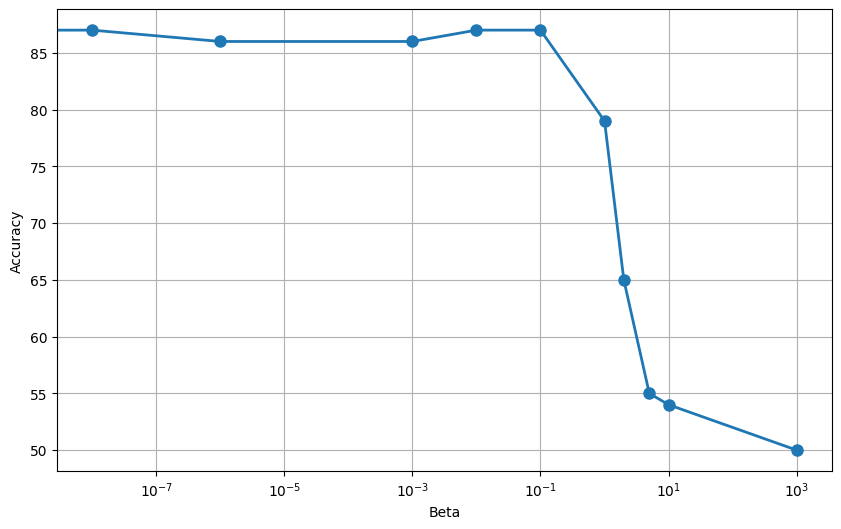

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(betas, accuracies, 'o-', linewidth=2, markersize=8)
plt.xscale('log') 
plt.xlabel('Beta')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [8]:
data_sizes = [1] + list(range(5, 51, 5))
accuracies = []
for data_size in data_sizes:
    preds = naive_bayes_classify(X_test, beta=0.1, data_size=data_size)
    accuracy = int(np.count_nonzero(preds == Y_test))
    accuracies.append(accuracy)
    print(f"{data_size = }\t{accuracy = }")

data_size = 1	accuracy = 46
data_size = 5	accuracy = 59
data_size = 10	accuracy = 75
data_size = 15	accuracy = 60
data_size = 20	accuracy = 71
data_size = 25	accuracy = 81
data_size = 30	accuracy = 81
data_size = 35	accuracy = 83
data_size = 40	accuracy = 84
data_size = 45	accuracy = 88
data_size = 50	accuracy = 87


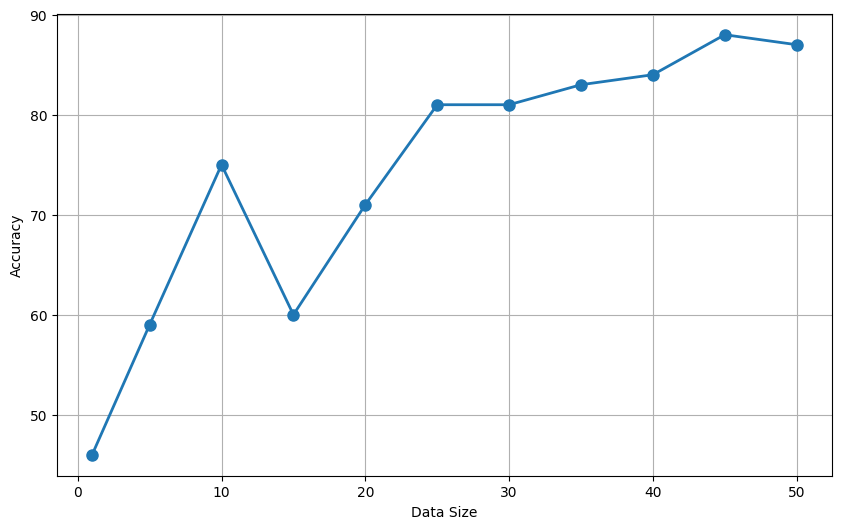

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, accuracies, 'o-', linewidth=2, markersize=8)
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.grid()
plt.show()